In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_gender_submission = pd.read_csv('data/titanic/gender_submission.csv')
df_test = pd.read_csv('data/titanic/test.csv')
df_train = pd.read_csv('data/titanic/train.csv')
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean())

In [5]:
#숫자형이 아닌 데이터는 평균, 중앙값 등으로 대체 불가함. 객실번호는 특정패턴이 없기에 최빈값으로 채우는 것도 무의미함. 결측값도 너무 많아 제거하긴 어려움. \
#따라서 'No info'를 의마하는 'N'으로 채워서 임의값임을 표기
df_train['Cabin'] = df_train['Cabin'].fillna('N')

In [6]:
df_train['Embarked'] = df_train['Embarked'].fillna('N')

In [7]:
list_col = ['Age', 'Cabin', 'Embarked']
for col in list_col:
  print( col+' null data count :', df_train[col].isnull().sum())

Age null data count : 0
Cabin null data count : 0
Embarked null data count : 0


In [9]:
def transform_status(x) :
    if "Mrs" in x or "Ms" in x :
        return "Mrs"
    elif "Mr" in x:
        return "Mr"
    elif "Miss" in x:
        return "Miss"
    elif "Master" in x:
        return "Master"
    elif "Dr" in x:
        return "Dr"
    elif "Rev" in x:
        return "Rev"
    elif "Col" in x:
        return "Col"
    else:
        return "0"

df_train["social_status"] = df_train["Name"].map(lambda x : transform_status(x))
del df_train["Name"]

In [13]:
df_train["Sex"] = df_train["Sex"].replace({"male" : 0, "female": 1})
df_train["Sex"]

/var/folders/15/zkzx17tx38l427s1h3d8tfy80000gn/T/ipykernel_1824/2730629983.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train["Sex"] = df_train["Sex"].replace({"male" : 0, "female": 1})


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [14]:
del df_train['Ticket']

In [16]:
df_train['Cabin'] = df_train['Cabin'].str[:1]
df_train['Cabin']

0      N
1      C
2      N
3      C
4      N
      ..
886    N
887    B
888    N
889    C
890    N
Name: Cabin, Length: 891, dtype: object

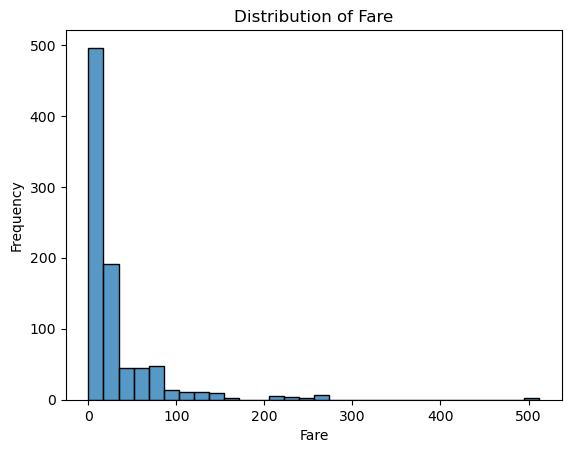

In [19]:
sns.histplot(data=df_train, x="Fare", bins=30)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()    

In [20]:
del df_train["Fare"]  #그래프상 카테고리화 어려울거로 판단

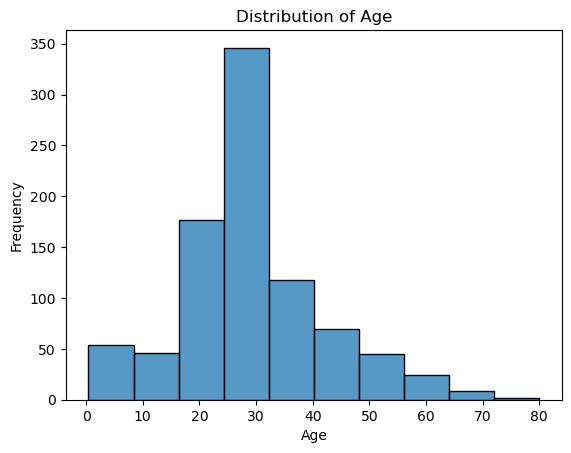

In [21]:
sns.histplot(data=df_train, x="Age", bins=10)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [22]:
df_train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000


In [24]:
def get_category(age):
    cat = ''
    if age <= -1 : cat = 'Unknown'
    elif age <= 5 : cat='Baby'
    elif age <= 12 : cat='Child'
    elif age <= 18 : cat='Teenager'
    elif age <= 25 : cat='Student'
    elif age <= 35 : cat='Young Child'
    elif age <= 60 : cat='Adult'
    else : cat='Elderly'

    return cat
    
df_train['Age_cat'] = df_train['Age'].apply(lambda x : get_category(x))
del df_train['Age']

In [25]:
df_train

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Cabin,Embarked,social_status,Age_cat
0,1,0,3,0,1,0,N,S,Mr,Student
1,2,1,1,1,1,0,C,C,Mrs,Adult
2,3,1,3,1,0,0,N,S,Miss,Young Child
3,4,1,1,1,1,0,C,S,Mrs,Young Child
4,5,0,3,0,0,0,N,S,Mr,Young Child
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,0,0,N,S,Rev,Young Child
887,888,1,1,1,0,0,B,S,Miss,Student
888,889,0,3,1,1,2,N,S,Miss,Young Child
889,890,1,1,0,0,0,C,C,Mr,Young Child


In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PassengerId    891 non-null    int64 
 1   Survived       891 non-null    int64 
 2   Pclass         891 non-null    int64 
 3   Sex            891 non-null    int64 
 4   SibSp          891 non-null    int64 
 5   Parch          891 non-null    int64 
 6   Cabin          891 non-null    object
 7   Embarked       891 non-null    object
 8   social_status  891 non-null    object
 9   Age_cat        891 non-null    object
dtypes: int64(6), object(4)
memory usage: 69.7+ KB


In [27]:
from sklearn import preprocessing 
list_col = ['Cabin', 'Embarked', 'social_status', 'Age_cat']
for col in list_col : 
    le = preprocessing.LabelEncoder()
    le.fit(df_train[col])
    df_train[col] = le.transform(df_train[col])
    label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"Lable Mapping for '{col}' : {label_mapping}")

Lable Mapping for 'Cabin' : {'A': np.int64(0), 'B': np.int64(1), 'C': np.int64(2), 'D': np.int64(3), 'E': np.int64(4), 'F': np.int64(5), 'G': np.int64(6), 'N': np.int64(7), 'T': np.int64(8)}
Lable Mapping for 'Embarked' : {'C': np.int64(0), 'N': np.int64(1), 'Q': np.int64(2), 'S': np.int64(3)}
Lable Mapping for 'social_status' : {'0': np.int64(0), 'Col': np.int64(1), 'Dr': np.int64(2), 'Master': np.int64(3), 'Miss': np.int64(4), 'Mr': np.int64(5), 'Mrs': np.int64(6), 'Rev': np.int64(7)}
Lable Mapping for 'Age_cat' : {'Adult': np.int64(0), 'Baby': np.int64(1), 'Child': np.int64(2), 'Elderly': np.int64(3), 'Student': np.int64(4), 'Teenager': np.int64(5), 'Young Child': np.int64(6)}


In [30]:
del df_train['PassengerId']
df_train

,Survived,Pclass,Sex,SibSp,Parch,Cabin,Embarked,social_status,Age_cat
0,0,3,0,1,0,7,3,5,4
1,1,1,1,1,0,2,0,6,0
2,1,3,1,0,0,7,3,4,6
3,1,1,1,1,0,2,3,6,6
4,0,3,0,0,0,7,3,5,6
...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,0,7,3,7,6
887,1,1,1,0,0,1,3,4,4
888,0,3,1,1,2,7,3,4,6
889,1,1,0,0,0,2,0,5,6


<Axes: xlabel='Sex', ylabel='Survived'>

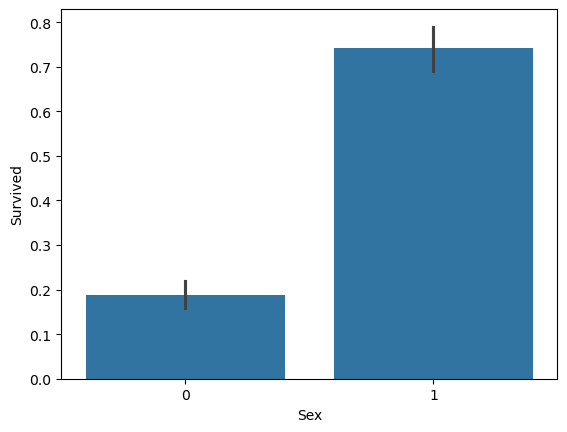

In [34]:
sns.barplot(x='Sex', y='Survived', data=df_train) 

<Axes: xlabel='Pclass', ylabel='Survived'>

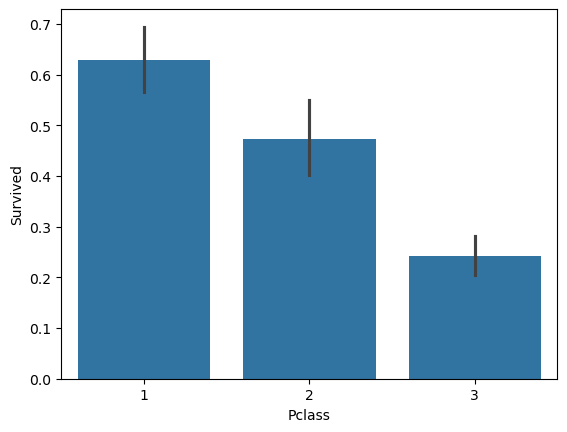

In [36]:
sns.barplot(x='Pclass', y='Survived', data=df_train) 

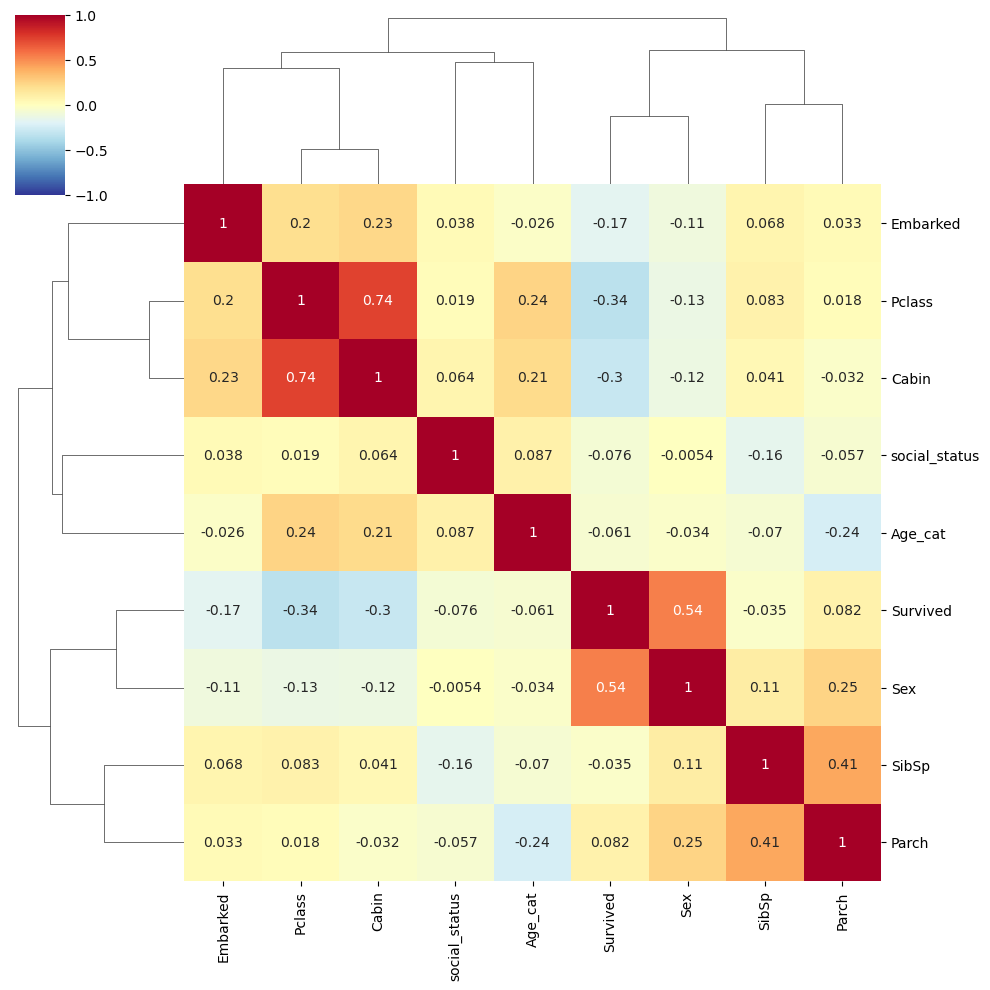

In [38]:
sns.clustermap(df_train.corr(),
               annot=True,
               cmap = 'RdYlBu_r',
               vmin = -1, vmax = 1)